### Avacado Project

#### Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

    Date -         The date of the observation
    AveragePrice - the average price of a single avocado
    type -         conventional or organic
    year -         the year
    Region -       the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 -         Total number of avocados with PLU 4046 sold
    4225 -         Total number of avocados with PLU 4225 sold
    4770 -         Total number of avocados with PLU 4770 sold


##### Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

#### Importing necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Understanding the dataset

In [4]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


- No null values throughout the dataset
- float(9), int(2), object(3) datatypes

In [7]:
# dropping the first column
df.drop('Unnamed: 0',axis=1,inplace=True)

# adding a month column for better visualization
df['Year'],df['Month'],df['Day']=df['Date'].str.split('-').str
df.drop(columns=['year','Date','Day'],inplace=True)
df.head(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11


In [8]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

- data is balanced

In [9]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

- Region is also balanced with 338 values for each region

In [10]:
len(df['region'].unique()) # 54 values

54

In [11]:
df['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

- Years are imbalanced

In [12]:
df['Year'] = df['Year'].astype('float')
df['Month'] = df['Month'].astype('float')

In [13]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


In [14]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969
Year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050


#### Visualization

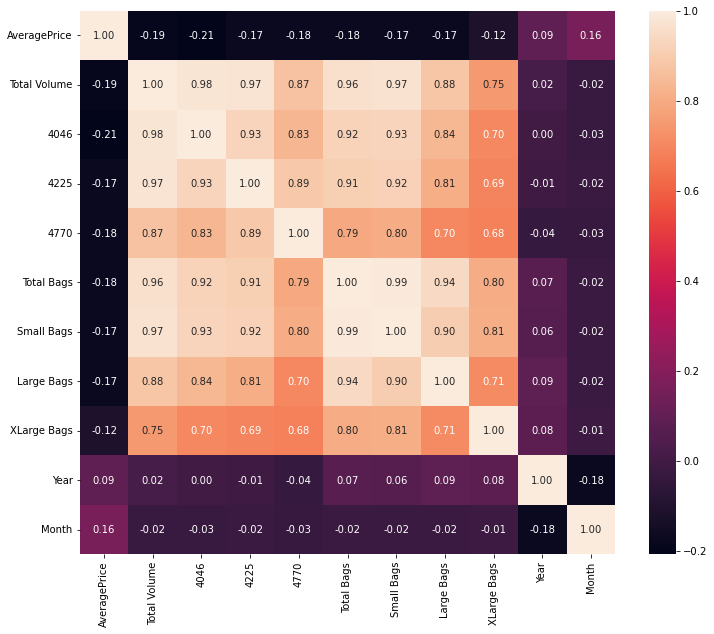

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

- High correlation can be seen in the following values:
        ♣ Total volume & 4046 (97.7%)
        ♣ Total volume & 4225 (97.4%)
        ♣ Total volume & 4770 (87.2%)
        ♣ Total volume & Small Bags (96.7%)
        ♣ Total volume & Large Bags (88%)
        ♦ 4046 & Small Bags (92.5) => Avocado 4046 are often bought in small bags
        ♦ 4225 & Small Bags (91%)  => Avocado 4225 are often bought in small bags
        ♦ 4770 & Small Bags (80%)  => Avocado 4770 are often bought in small bags 
        
- small bags are used more than large and XLarge bags. So, we can safely assume, small bags does the most contribution to total bags 

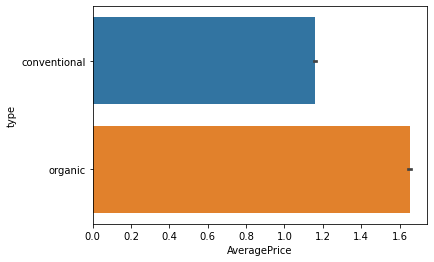

In [16]:
sns.barplot(x='AveragePrice',y='type',data=df)
plt.show()

- Average price of conventional maxes out at 1.1~
- Average price of organic maxes out at 1.6~
- Two possible reasons why the average price of organic is high:
    - High demand = high price
    - High quality = high price

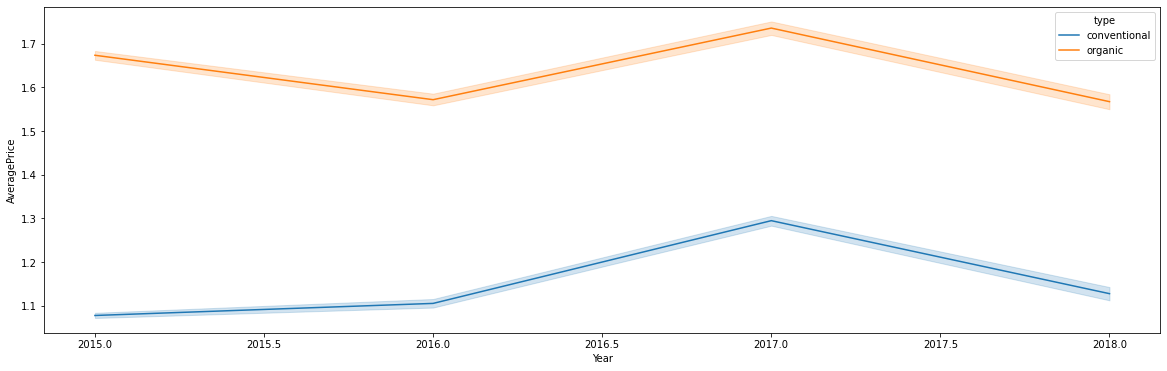

In [17]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Year',y='AveragePrice',hue='type',data=df)
plt.show()

- According to this plot the peak year is 2017
- However, we need to keep in mind that the 'Year' data is imbalanced (especially 2018)
    - 2017  => 5722
    - 2016  => 5616
    - 2015  => 5615
    - 2018  => 1296

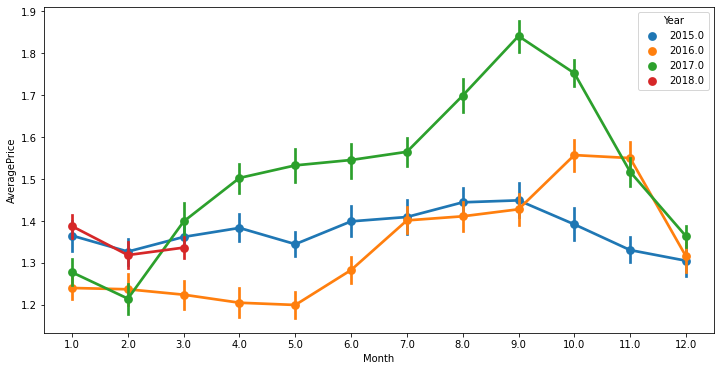

In [18]:
plt.figure(figsize=(12,6))
sns.pointplot(x='Month',y='AveragePrice',data=df,hue='Year')
plt.show()

- Peak month starts from 8(August) until 12(December)
- End of summer <=> Start of winter

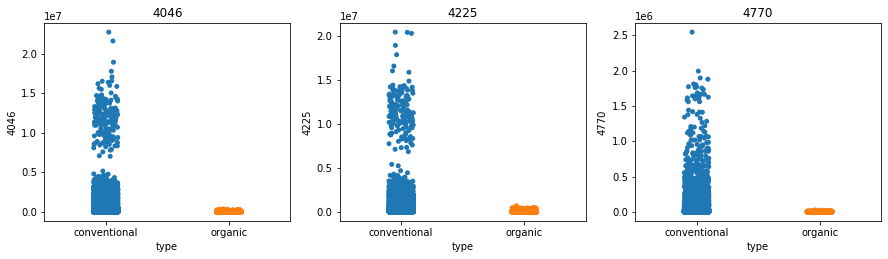

In [19]:
df_PLUs = df.drop(['Total Bags','Small Bags','Large Bags','XLarge Bags','Total Volume', 'AveragePrice',
                   'type','region','Year','Month'],axis=1)
collist=df_PLUs.columns.values
ncol=3
nrow=2

plt.figure(figsize=(15,8))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.stripplot(x=df['type'],y=df_PLUs[collist[i]])
    plt.title(df_PLUs.columns[i])

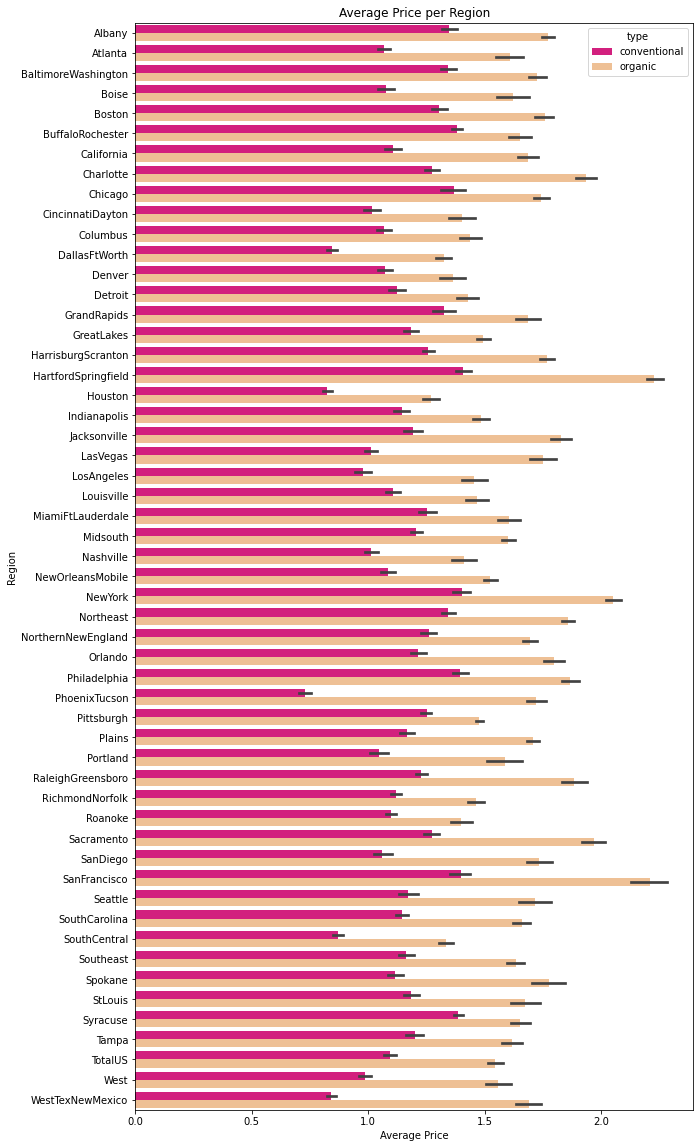

In [20]:
plt.figure(figsize=(10,20))
sns.barplot(x='AveragePrice',y='region',hue='type',data=df, palette='Accent_r')
plt.ylabel("Region")
plt.xlabel("Average Price")
plt.title("Average Price per Region")
plt.show()

In [21]:
# there is a region names 'TotalUS' which contains the total data of all the PLUs and Bags sold
# dropping the rows which contain the rehion 'TotalUS' as it can bring skewness into the dataset, 
# because the values differ greatly from the mean

df = df.loc[(df['region']!='TotalUS')]
df.shape

(17911, 13)

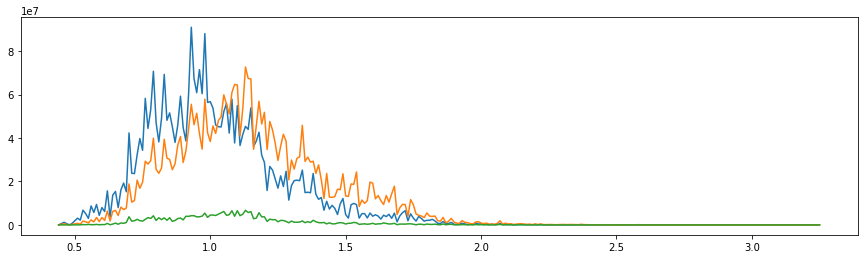

In [22]:
plt.figure(figsize=(15,4))
plt.plot(df[['4046', '4225', '4770']].groupby(df['AveragePrice']).sum())
plt.show()

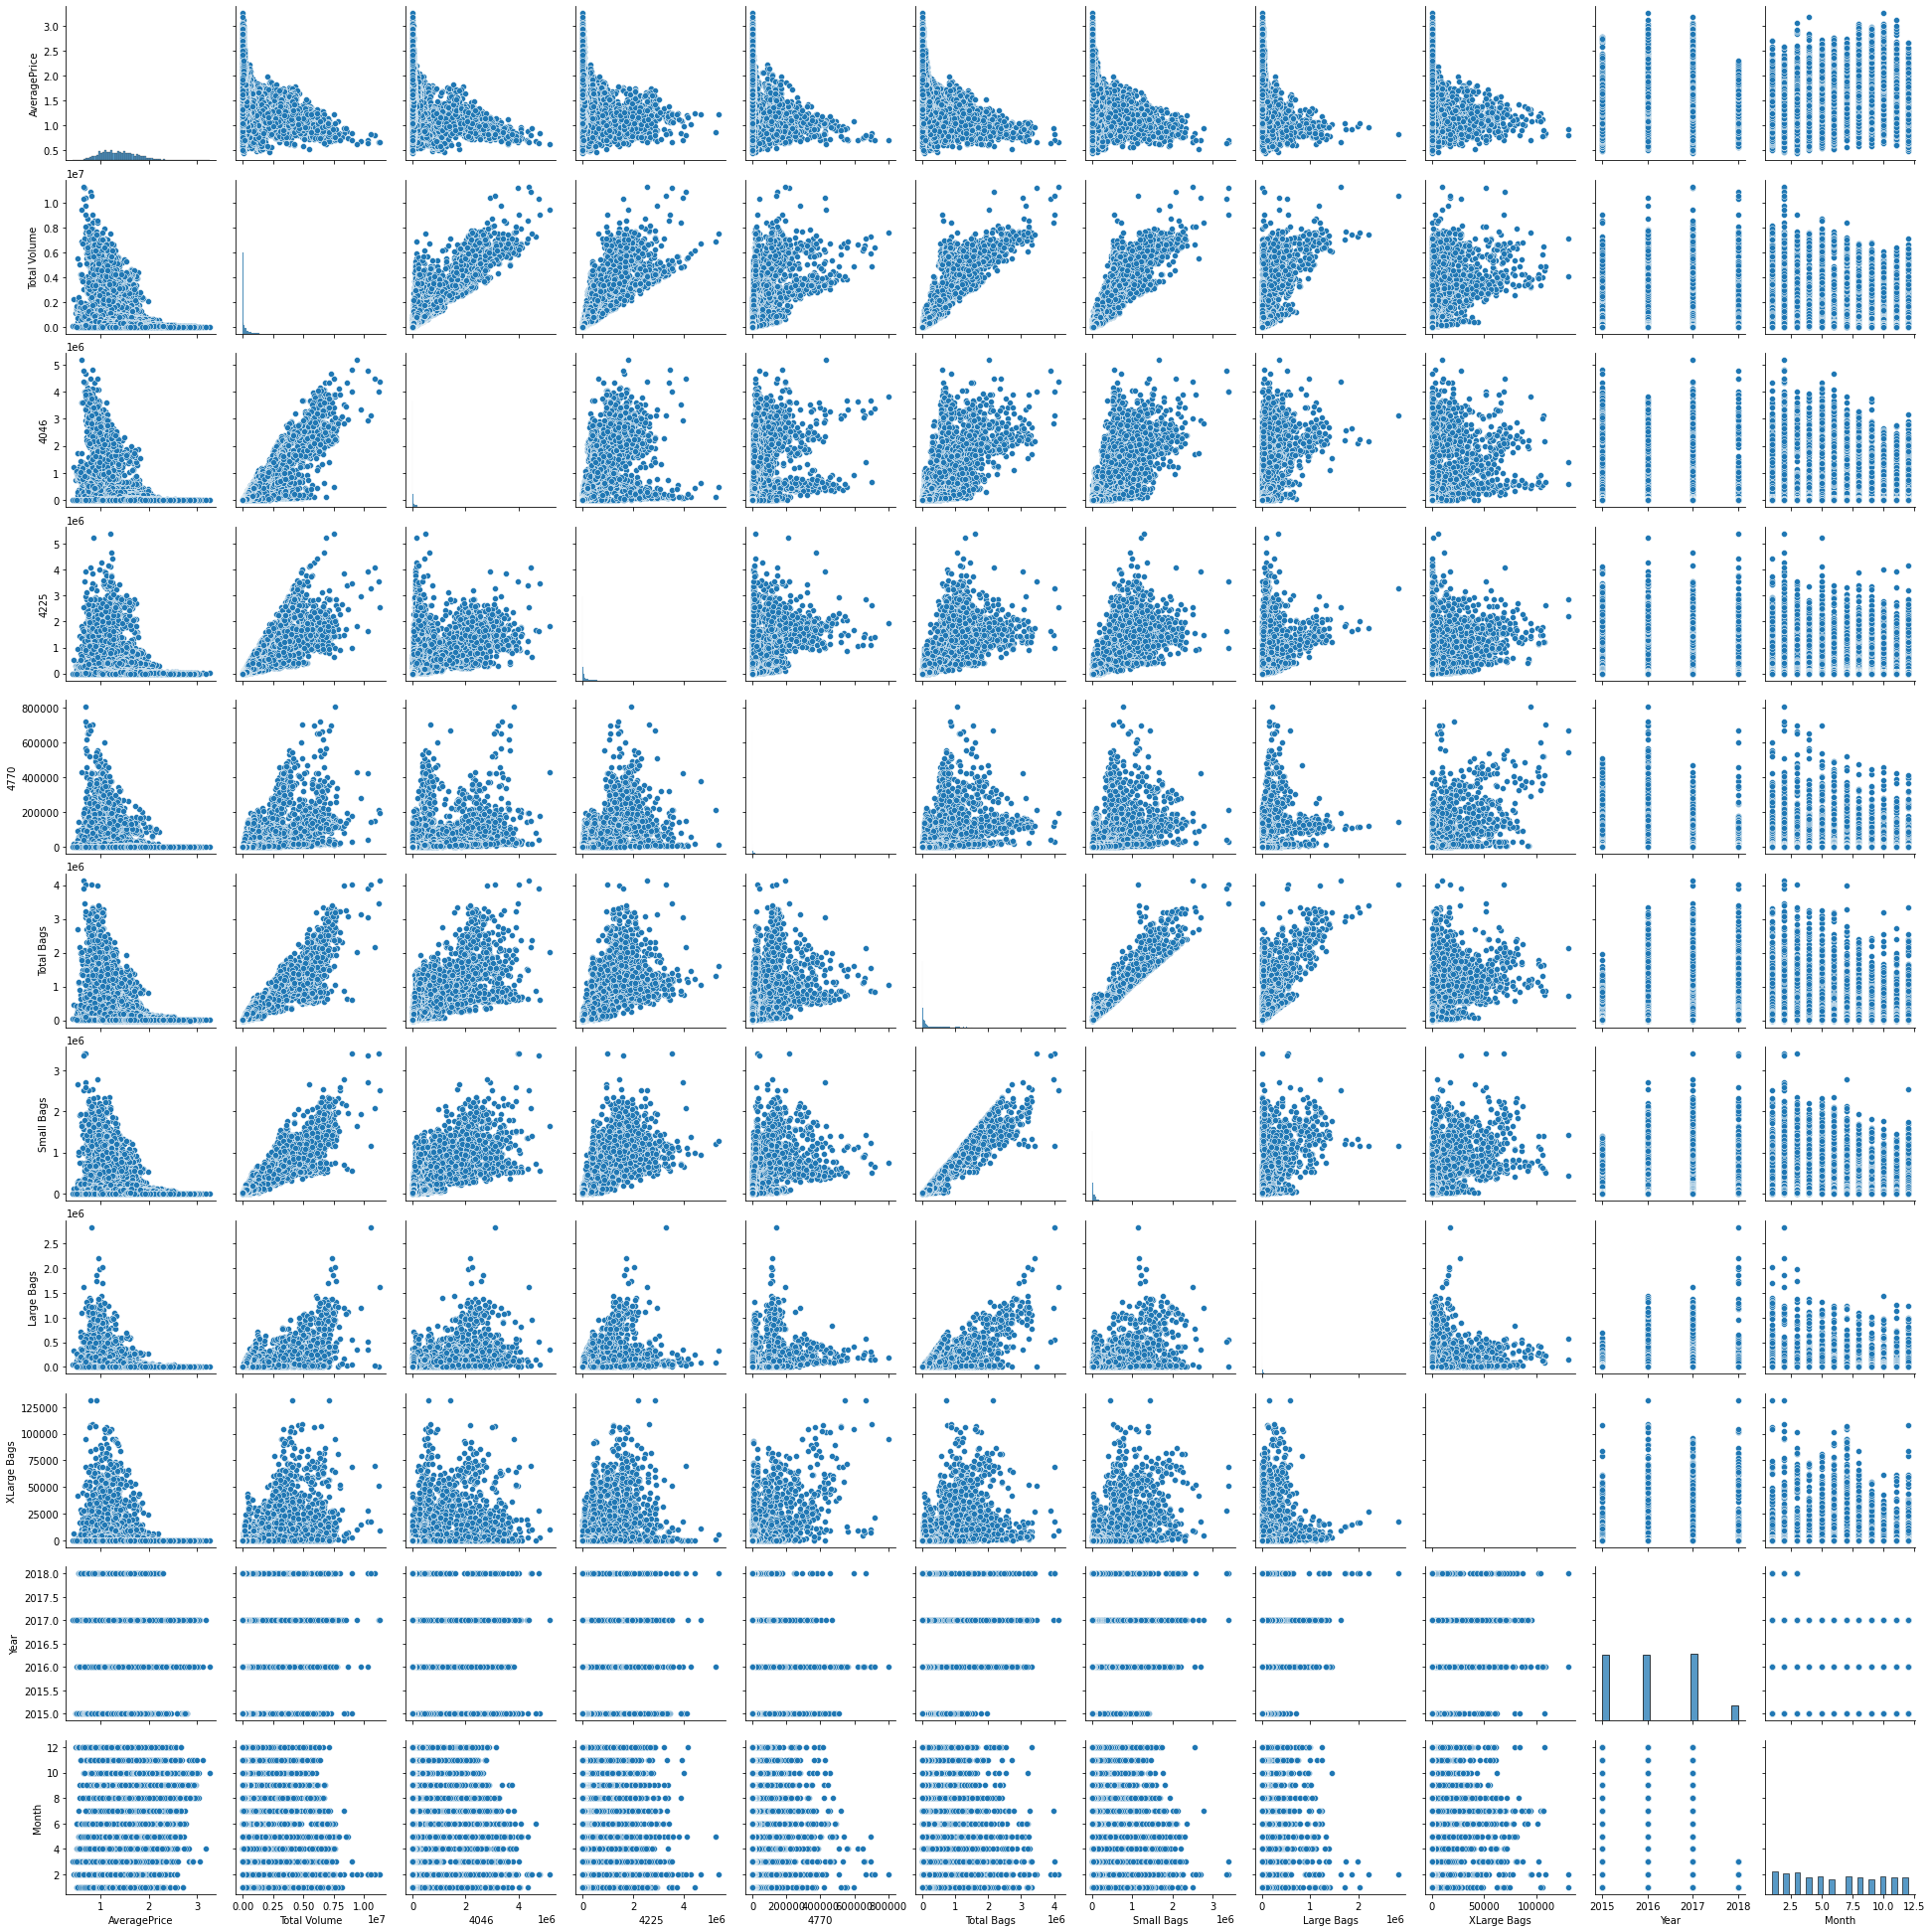

In [23]:
sns.pairplot(df)
plt.show()

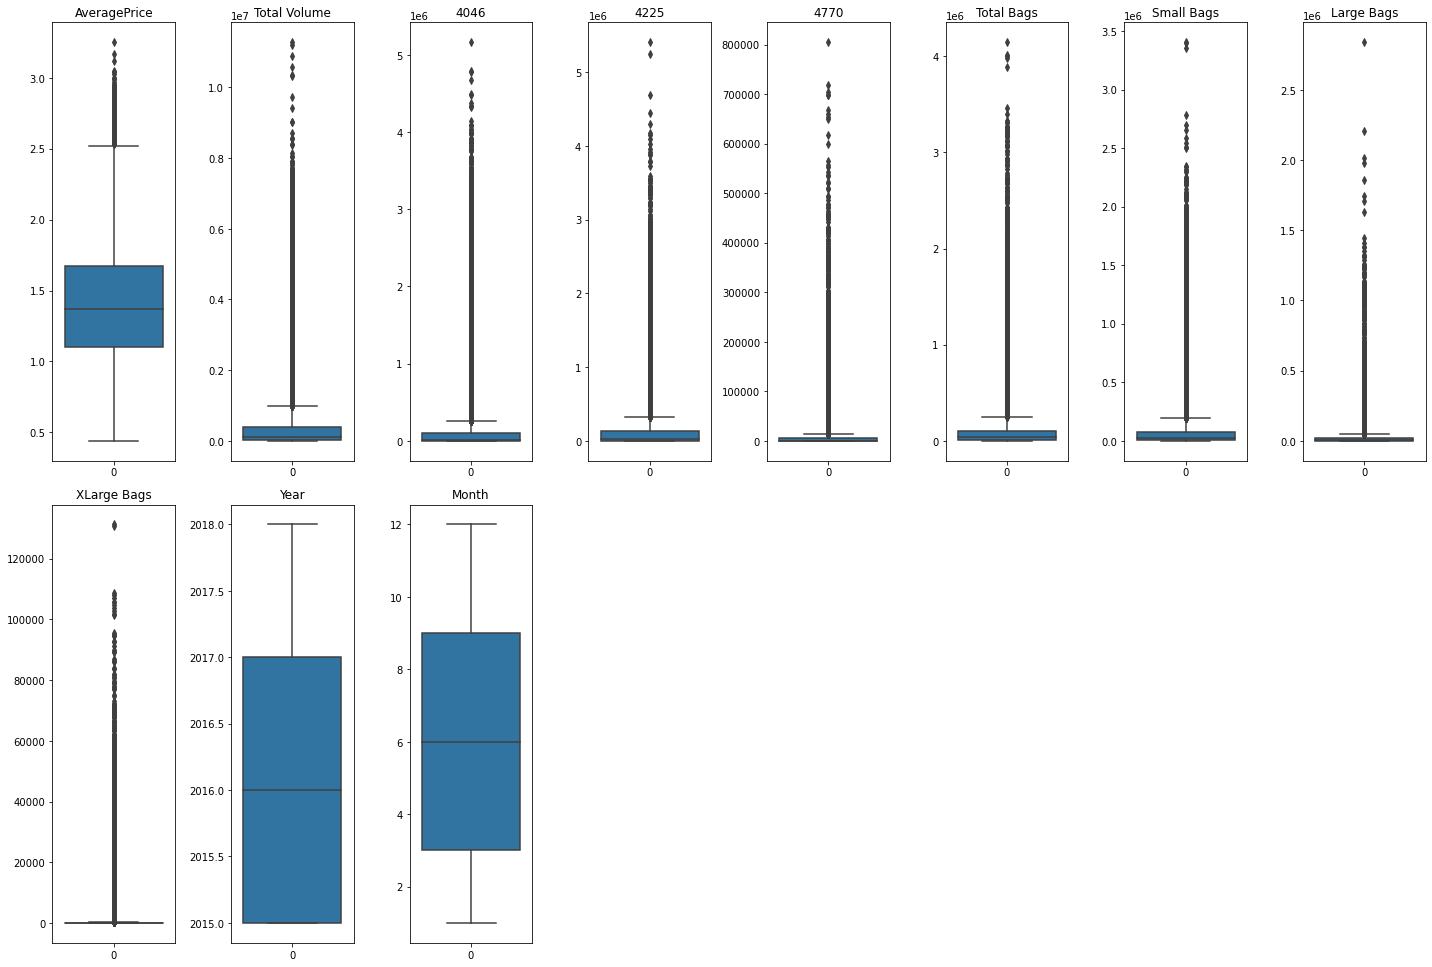

In [24]:
#outliers
df_temp = df.drop(['type','region'],axis=1)
collist=df_temp.columns.values
ncol=8
nrow=3

plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data=df_temp[collist[i]])
    plt.title(df_temp.columns[i])
    plt.tight_layout()

#### LabelEncoding "Type" & "region"

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['type'] = le.fit_transform(df['type']).astype('float')
df['region'] = le.fit_transform(df['region']).astype('float')

#### Multicollinearity

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Variables'] = df.columns
vif['VIF Factor'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif

,Variables,VIF Factor
0,AveragePrice,2.297968e+01
1,Total Volume,1.421081e+09
2,4046,2.374977e+08
3,4225,1.903350e+08
4,4770,2.060307e+06
5,Total Bags,3.882413e+13
6,Small Bags,2.268816e+13
7,Large Bags,3.529467e+12
8,XLarge Bags,1.764920e+10
9,type,3.621541e+00


#### Outlier removal using Zscore

In [27]:
from scipy.stats import zscore

z = np.abs(zscore(df))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,0.192012,0.387996,0.354831,0.295965,0.297096,0.394907,0.386004,0.302010,0.240304,0.999833,1.699657,1.221282,1.647633
1,0.142537,0.395640,0.355535,0.317683,0.296887,0.392689,0.383118,0.301973,0.240304,0.999833,1.699657,1.221282,1.647633
2,1.181519,0.343902,0.355301,0.174952,0.295409,0.396420,0.388018,0.301924,0.240304,0.999833,1.699657,1.221282,1.647633
3,0.810454,0.375943,0.354647,0.257198,0.296595,0.402822,0.396501,0.301655,0.240304,0.999833,1.699657,1.221282,1.647633
4,0.315701,0.398775,0.355016,0.319454,0.296530,0.401800,0.395393,0.301094,0.240304,0.999833,1.699657,1.221282,1.364670
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.550118,0.426517,0.352870,0.413064,0.298082,0.381737,0.369992,0.299039,0.240304,1.000168,1.700227,1.970504,1.181995
18245,0.748019,0.429120,0.354531,0.408855,0.298082,0.393349,0.384797,0.299978,0.240304,1.000168,1.700227,1.970504,1.464958
18246,1.143822,0.429219,0.354530,0.411021,0.283170,0.392995,0.383320,0.302457,0.240304,1.000168,1.700227,1.970504,1.464958
18247,1.292248,0.427227,0.353878,0.409852,0.283189,0.388674,0.377696,0.302390,0.240304,1.000168,1.700227,1.970504,1.464958


In [28]:
df_new = df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,2015.0,12.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,2015.0,12.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,2015.0,12.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,2015.0,12.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,2015.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,52.0,2018.0,2.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,52.0,2018.0,1.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,52.0,2018.0,1.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,52.0,2018.0,1.0


In [29]:
print ("Percentage of data loss =",(df.shape[0]-df_new.shape[0])/df.shape[0]*100,'%')

Percentage of data loss = 7.939255206297806 %


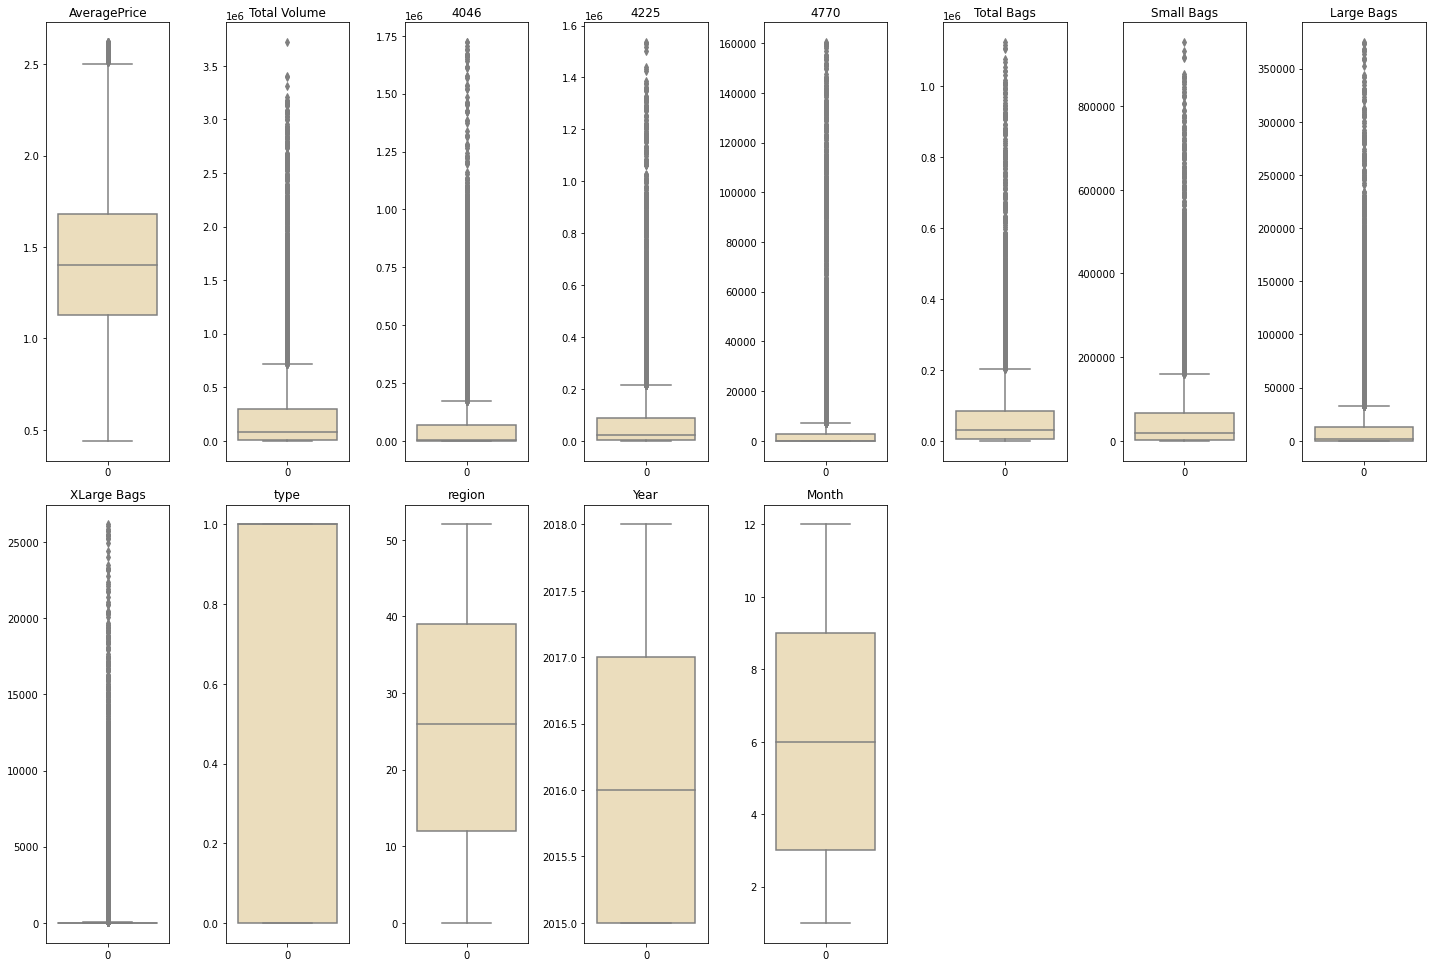

In [30]:
#looking at outliers after using zscore method

collist=df_new.columns.values
ncol=8
nrow=3

plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data=df_new[collist[i]],color='#F3E0B5')
    plt.title(df_new.columns[i])
    plt.tight_layout()

- outliers still present even after zscore method

### Seperating values into X & Y for Regression Models

In [31]:
x = df_new.drop('AveragePrice',axis=1)
y = df_new['AveragePrice']

#### Skewness

In [32]:
df.skew()

AveragePrice    0.577132
Total Volume    3.608709
4046            4.423296
4225            4.127037
4770            6.259901
Total Bags      4.497227
Small Bags      4.284061
Large Bags      7.916074
XLarge Bags     6.952878
type            0.000335
region          0.000031
Year            0.215342
Month           0.106618
dtype: float64

- taking the threshold as +/- 0.5, the following columns are skewed

        - total volume
        - 4046 
        - 4225
        - 4770
        - total bags
        - small bags
        - large bags
        - x large bags

In [33]:
# reducing skewness suing power transform
from sklearn.preprocessing import power_transform

x = power_transform(x,method='yeo-johnson')

In [34]:
df_pt = pd.DataFrame(x)
df_pt.skew()

0    -0.036696
1    -0.051553
2    -0.072390
3     0.047409
4    -0.059451
5    -0.073857
6    -0.125451
7     1.009043
8    -0.142651
9    -0.264759
10    0.222468
11   -0.147660
dtype: float64

- the skewness is below the threshold (+/- 0.5)

In [35]:
#checking multicollinearity 

x_df = pd.DataFrame(x)
vif_new = pd.DataFrame()
vif_new['Variables'] = df.columns[1:]
vif_new['VIF Factor'] = [variance_inflation_factor(x_df.values,i) for i in range(x_df.shape[1])]
vif_new

,Variables,VIF Factor
0,Total Volume,50.493372
1,4046,6.570456
2,4225,10.536825
3,4770,3.482806
4,Total Bags,33.476945
5,Small Bags,16.508769
6,Large Bags,3.299001
7,XLarge Bags,1.912371
8,type,4.190766
9,region,1.076092


- VIF has also been decreased

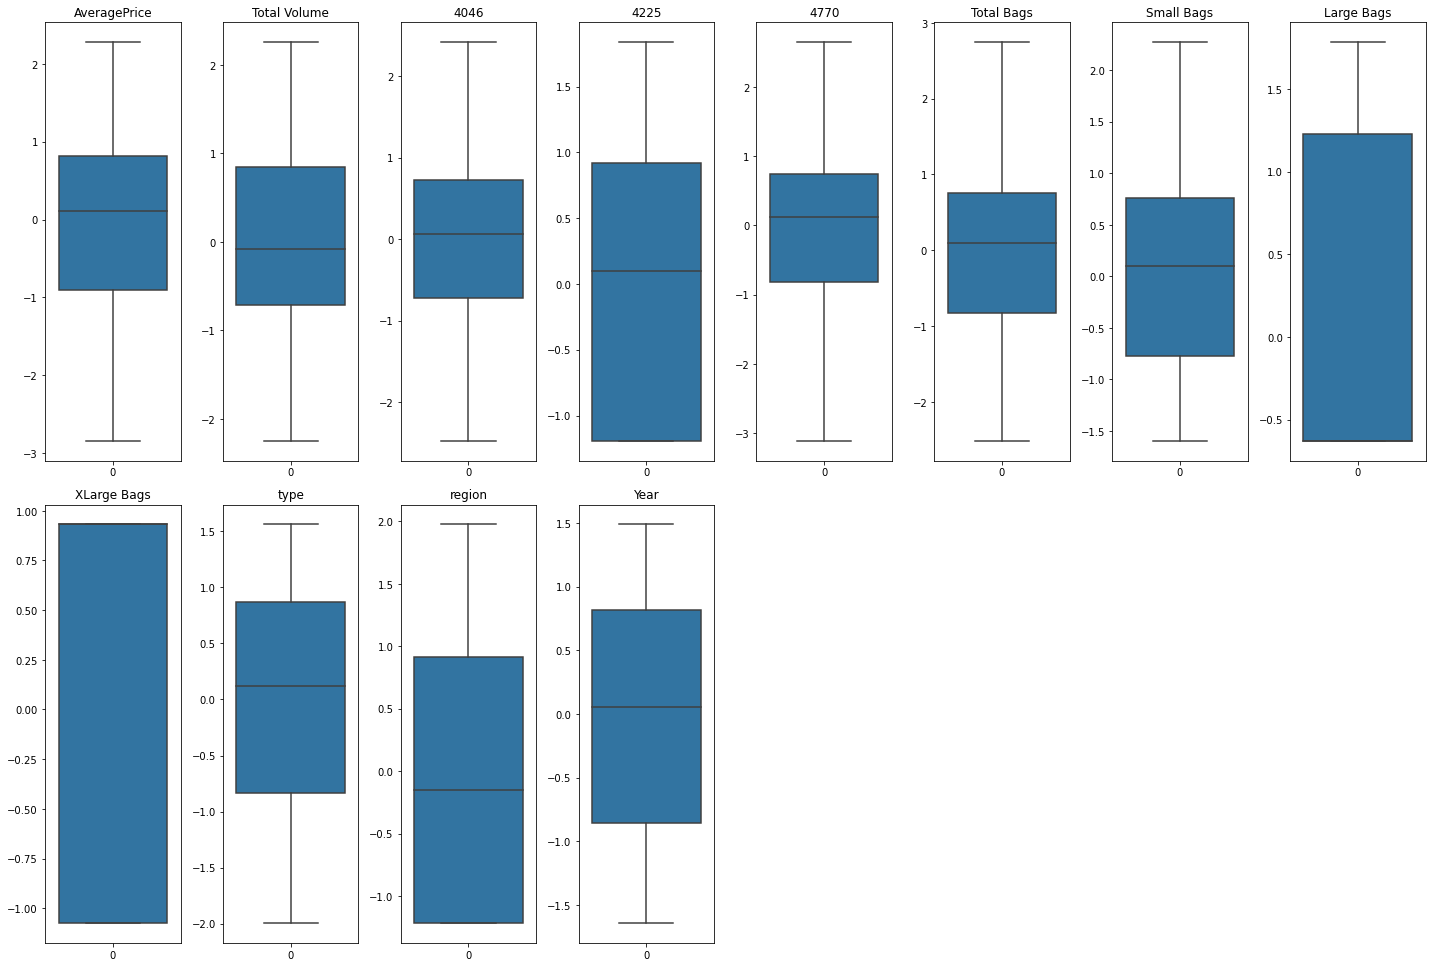

In [36]:
#looking at outliers after using zscore method

collist=x_df.columns.values
ncol=8
nrow=3

plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data=x_df[collist[i]])
    plt.title(df_new.columns[i])
    plt.tight_layout()

- no outliers can be seen after power transform

In [ ]:
from sklearn.preprocessing import StandardScaler
# scaling
ss= StandardScaler()
ss.fit_transform(x)

#### Train_test_split

In [37]:
from sklearn.model_selection import train_test_split,GridSearchCV

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=8)

####  Regression Models to predict the 'Average Price'

In [38]:
# making a function 
from sklearn.metrics import mean_squared_error, r2_score
Model, score, rmse, r2 = [], [], [], []

def regression_model(model, x_train, x_test, y_train, y_test, score, rmse):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    scoree = round(model.score(x_train,y_train)*100,2)
    score.append(scoree)
    
    r2_s = round(r2_score(y_test,y_pred)*100,2)
    r2.append(r2_s)
    
    Rmse = mean_squared_error(y_test,y_pred,squared=False)
    rmse.append(Rmse)
    
    print ("Model:",str(model).split("(")[0])
    Model.append(str(model).split("(")[0])
    print ("Score:",scoree)
    print ("R2 Score:",r2_s)
    print ("RMSE:",Rmse)

In [39]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lreg = LinearRegression()
regression_model(lreg, x_train, x_test, y_train, y_test, score, rmse)

Model: LinearRegression
Score: 55.84
R2 Score: 55.8
RMSE: 0.25783791184242794


In [40]:
from sklearn.svm import SVR

svr = SVR()
svr_para = {'kernel':['linear', 'poly', 'rbf'],'gamma':['scale','auto']}
gs_svr = GridSearchCV(svr,svr_para,cv=3,scoring='accuracy')
gs_svr.fit(x_train,y_train)
gs_svr.best_params_

{'gamma': 'scale', 'kernel': 'linear'}

In [47]:
svr = SVR(gamma='scale',kernel='linear')
regression_model(svr, x_train, x_test, y_train, y_test, score, rmse)

Model: SVR
Score: 55.65
R2 Score: 55.76
RMSE: 0.2579614121131259


In [41]:
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor

In [42]:
rfr = RandomForestRegressor()
rfr_para = {'max_features':['sqrt','log2']}
gs_rfr = GridSearchCV(rfr,rfr_para,cv=3,scoring='accuracy')
gs_rfr.fit(x_train,y_train)
gs_rfr.best_params_

{'max_features': 'sqrt'}

In [48]:
rfr = RandomForestRegressor(max_features='sqrt')
regression_model(rfr, x_train, x_test, y_train, y_test, score, rmse)

Model: RandomForestRegressor
Score: 98.33
R2 Score: 88.48
RMSE: 0.13165856121213218


In [43]:
ada = AdaBoostRegressor()
ada_para = {'loss':['linear','square','exponential']}
gs_ada = GridSearchCV(ada,ada_para,cv=3,scoring='accuracy')
gs_ada.fit(x_train,y_train)
gs_ada.best_params_

{'loss': 'linear'}

In [49]:
ada = AdaBoostRegressor(loss='linear')
regression_model(ada, x_train, x_test, y_train, y_test, score, rmse)

Model: AdaBoostRegressor
Score: 55.9
R2 Score: 55.07
RMSE: 0.25995076546182827


In [44]:
br = BaggingRegressor()
br_para = {'n_estimators':np.arange(100,500,50)}
gs_br = GridSearchCV(br,br_para,cv=3,scoring='accuracy')
gs_br.fit(x_train,y_train)
gs_br.best_params_

{'n_estimators': 100}

In [50]:
br = BaggingRegressor(n_estimators=100)
regression_model(br, x_train, x_test, y_train, y_test, score, rmse)

Model: BaggingRegressor
Score: 98.38
R2 Score: 88.67
RMSE: 0.13055374774061707


In [45]:
gbr = GradientBoostingRegressor()
gbr_para = {'loss':['huber','quantile'],'n_estimators':range(50,250,50),
            'criterion':['friedman_mse','mse','squared_error']}
gs_gbr = GridSearchCV(gbr,gbr_para,cv=3,scoring='accuracy')
gs_gbr.fit(x_train,y_train)
gs_gbr.best_params_

{'criterion': 'friedman_mse', 'loss': 'huber', 'n_estimators': 50}

In [51]:
gbr = GradientBoostingRegressor(loss='huber',n_estimators=50,criterion='friedman_mse')
regression_model(gbr, x_train, x_test, y_train, y_test, score, rmse)

Model: GradientBoostingRegressor
Score: 67.55
R2 Score: 67.25
RMSE: 0.22196190971187402


In [52]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr_para = {'algorithm':['auto','ball_tree','kd_tree','brute'],'n_neighbors':range(1,51),'weights':['uniform','distance']}
gs_knr = GridSearchCV(knr,knr_para,cv=3,scoring='accuracy')
gs_knr.fit(x_train,y_train)
gs_knr.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [54]:
knn = KNeighborsRegressor(algorithm='auto',n_neighbors=1,weights='uniform')
regression_model(knn, x_train, x_test, y_train, y_test, score, rmse)

Model: KNeighborsRegressor
Score: 100.0
R2 Score: 86.02
RMSE: 0.14502075299512235


In [46]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr_para = {'criterion':['friedman_mse','poisson','squared_error','absolute_error'],'splitter':['best','random']}
gs_dtr = GridSearchCV(dtr,dtr_para,cv=3,scoring='accuracy')
gs_dtr.fit(x_train,y_train)
gs_dtr.best_params_

{'criterion': 'friedman_mse', 'splitter': 'best'}

In [55]:
dtr = DecisionTreeRegressor(criterion='friedman_mse',splitter='best')
regression_model(dtr, x_train, x_test, y_train, y_test, score, rmse)

Model: DecisionTreeRegressor
Score: 100.0
R2 Score: 76.71
RMSE: 0.18716591421005618


In [56]:
regressor_models = pd.DataFrame({'Model Name':Model,'Score':score,'R2 Score':r2,'RMSE':rmse})
regressor_models.sort_values(by='R2 Score',ascending=False)

,Model Name,Score,R2 Score,RMSE
4,BaggingRegressor,98.38,88.67,0.130554
2,RandomForestRegressor,98.33,88.48,0.131659
6,KNeighborsRegressor,100.00,86.02,0.145021
7,DecisionTreeRegressor,100.00,76.71,0.187166
5,GradientBoostingRegressor,67.55,67.25,0.221962
0,LinearRegression,55.84,55.80,0.257838
1,SVR,55.65,55.76,0.257961
3,AdaBoostRegressor,55.90,55.07,0.259951


- The best model according to the R2 Score is BaggingRegressor

#### Saving the BaggingRegressor model

In [57]:
import pickle
pickle.dump(regressor_models,open("bagging_avocado",'wb'))

### Seperating into x_c and y_c for Classification Models 

In [58]:
x_c = df_new.drop('region',axis=1)
y_c = df_new['region']

In [60]:
# applying power transform to x_c
x_c = power_transform(x_c,method='yeo-johnson')

In [61]:
# splitting data into train and test
xc_train,xc_test,yc_train,yc_test = train_test_split(x_c, y_c, test_size=0.2, random_state=10)

#### Classification models to predict 'region'

In [62]:
# making a function for roc_auc score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(yc_test,yc_pred):
    lb=LabelBinarizer()
    yc_test_new=lb.fit_transform(yc_test)
    yc_pred_new=lb.fit_transform(yc_pred)
    return round(roc_auc_score(yc_test_new,yc_pred_new)*100,2)

In [120]:
# making a function for classification models
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

Model_c, score_c, f1, cross, roc_auc = [], [], [], [], []

def classification_model(model, xc_train, xc_test, yc_train, yc_test):
    Model_c.append(str(model).split("(")[0])
    model.fit(xc_train,yc_train)
    yc_pred = model.predict(xc_test)
    
    scoree = round(accuracy_score(yc_test,yc_pred)*100,2)
    score_c.append(scoree)
    
    f1_s = round(f1_score(yc_test,yc_pred,average='micro')*100,2)
    f1.append(f1_s)
    
    cross_v = cross_val_score(model,x_c,y_c,cv=10,scoring='accuracy').mean()
    cross.append(cross_v)
    
    roc_ = multiclass_roc_auc_score(yc_test,yc_pred)
    roc_auc.append(roc_)
    
    print ("Model:",str(model).split("(")[0])
    print ("Accuracy Score:",scoree)
    print ("f1 Score:",f1_s)
    print ("CV Score:",cross_v)
    print ("ROC_AUC Score:",roc_)

#     shows the classification report
#     class_report = classification_report(yc_test,model.predict(xc_test))
#     print (class_report)
    
    
#     shows the confusion matrix
    plt.figure(figsize=(20,15))
    sns.heatmap(confusion_matrix(yc_test,yc_pred), annot=True,square=True)

In [64]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_para = {'penalty':['l1','l2','elasticnet','none'],'C':[1,10]}
gs_lr = GridSearchCV(lr,lr_para,cv=3,scoring='accuracy')
gs_lr.fit(xc_train,yc_train)
gs_lr.best_params_

{'C': 1, 'penalty': 'none'}

Model: LogisticRegression
Accuracy Score: 59.52
f1 Score: 59.52
CV Score: 0.49245063203942363
ROC_AUC Score: 80.34


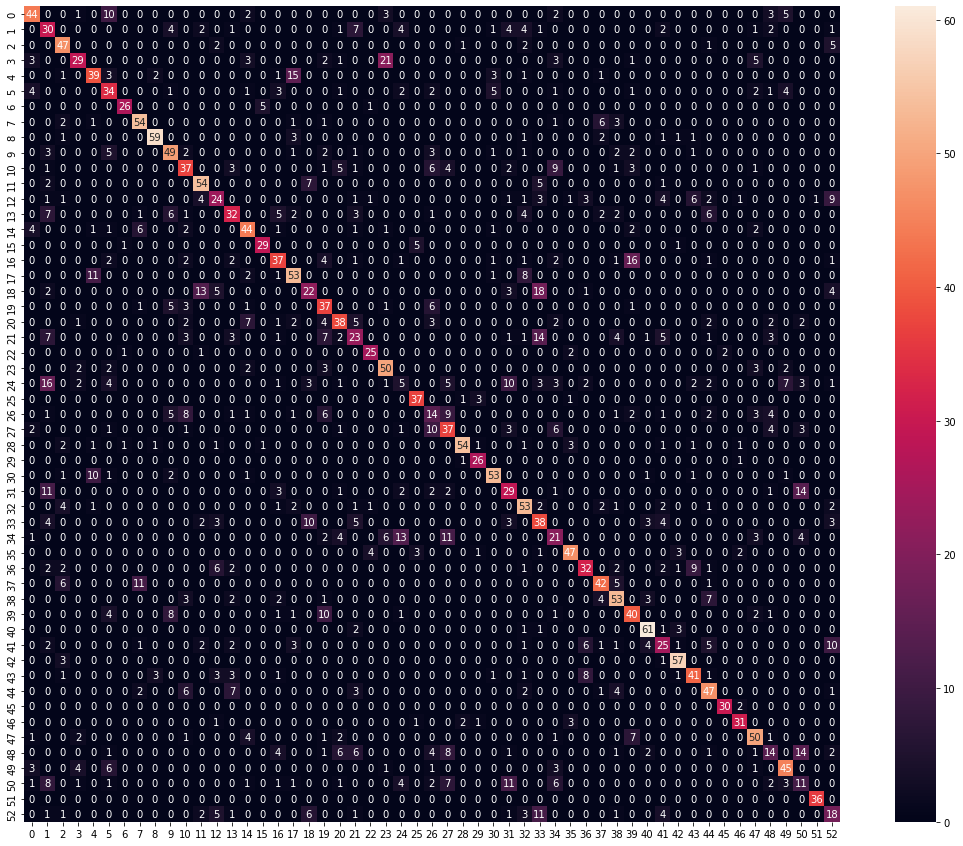

In [121]:
lr = LogisticRegression(penalty='none',C=1)
classification_model(lr,xc_train,xc_test,yc_train,yc_test)

In [80]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_para = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random']}
gsCV_dtc = GridSearchCV(dtc,dtc_para,cv=3,scoring='accuracy')
gsCV_dtc.fit(xc_train,yc_train)
gsCV_dtc.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

Model: DecisionTreeClassifier
Accuracy Score: 81.23
f1 Score: 81.23
CV Score: 0.6171354954753395
ROC_AUC Score: 90.99


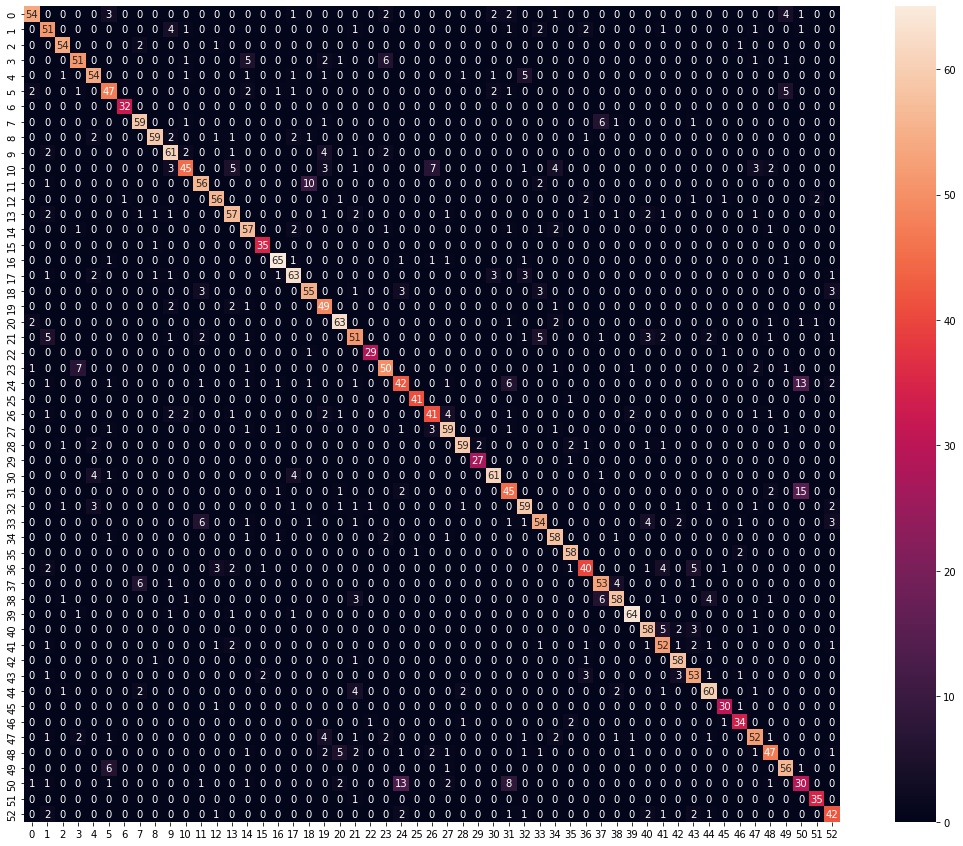

In [122]:
dtc = DecisionTreeClassifier(criterion='entropy',splitter='best')
classification_model(dtc,xc_train,xc_test,yc_train,yc_test)

In [82]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

rfc = RandomForestClassifier()
rfc_para = {'n_estimators':range(50,250,50),'criterion':['gini','entropy']}
gsCV_rfc = GridSearchCV(rfc,rfc_para,cv=3,scoring='accuracy')
gsCV_rfc.fit(xc_train,yc_train)
gsCV_rfc.best_params_

{'criterion': 'gini', 'n_estimators': 150}

Model: RandomForestClassifier
Accuracy Score: 91.45
f1 Score: 91.45
CV Score: 0.7605058523259169
ROC_AUC Score: 95.83


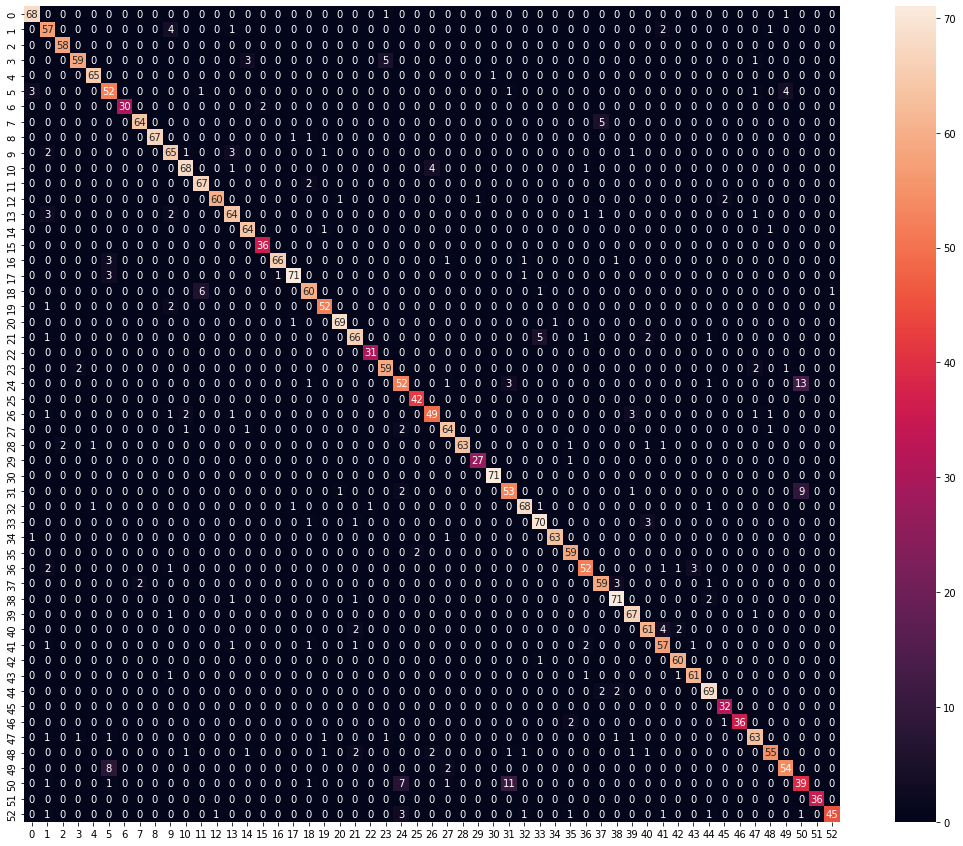

In [123]:
rfc = RandomForestClassifier(n_estimators=150,criterion='gini')
classification_model(rfc,xc_train,xc_test,yc_train,yc_test)

In [84]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
bc_para = {'n_estimators':range(50,250,50)}
gsCV_bc = GridSearchCV(bc,bc_para,scoring='accuracy')
gsCV_bc.fit(xc_train,yc_train)
gsCV_bc.best_params_

{'n_estimators': 150}

Model: BaggingClassifier
Accuracy Score: 89.24
f1 Score: 89.24
CV Score: 0.726179112671993
ROC_AUC Score: 94.77


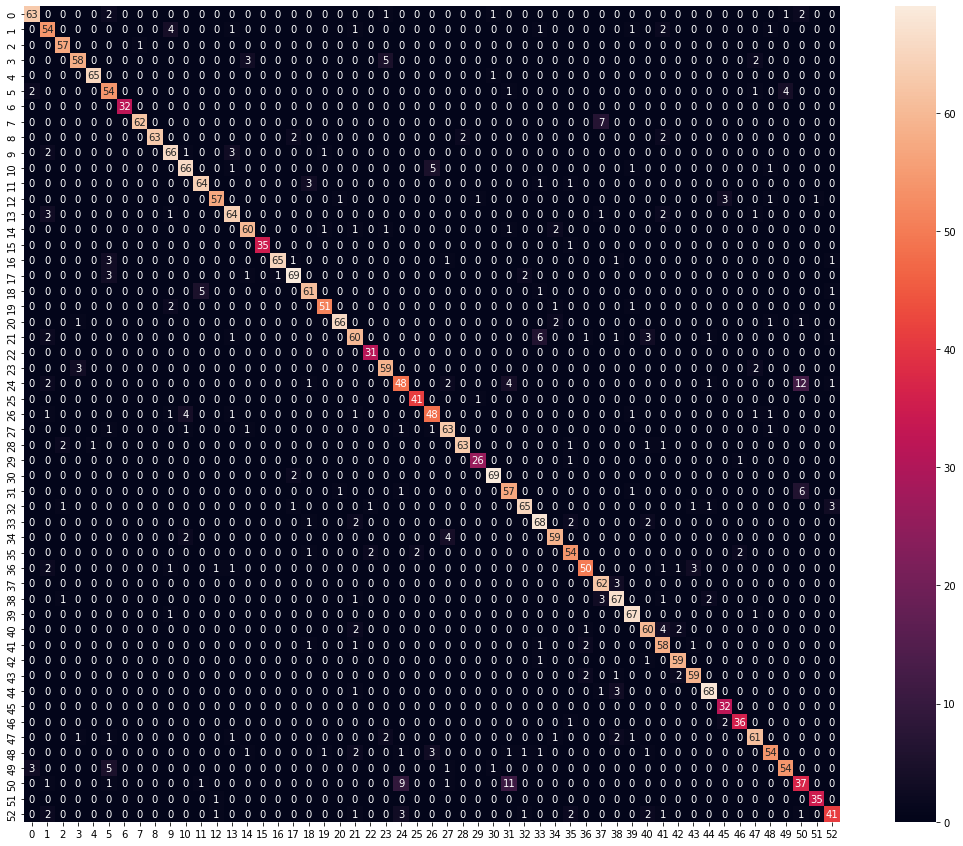

In [124]:
bc = BaggingClassifier(n_estimators=150)
classification_model(bc,xc_train,xc_test,yc_train,yc_test)

In [87]:
from sklearn.svm import SVC
svc = SVC()
svc_para={'C':[1,10],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
gsCV_svc = GridSearchCV(svc,svc_para,cv=3,scoring='accuracy')
gsCV_svc.fit(xc_train,yc_train)
gsCV_svc.best_params_

{'C': 10, 'kernel': 'rbf'}

Model: SVC
Accuracy Score: 92.03
f1 Score: 92.03
CV Score: 0.7221709464989078
ROC_AUC Score: 96.13


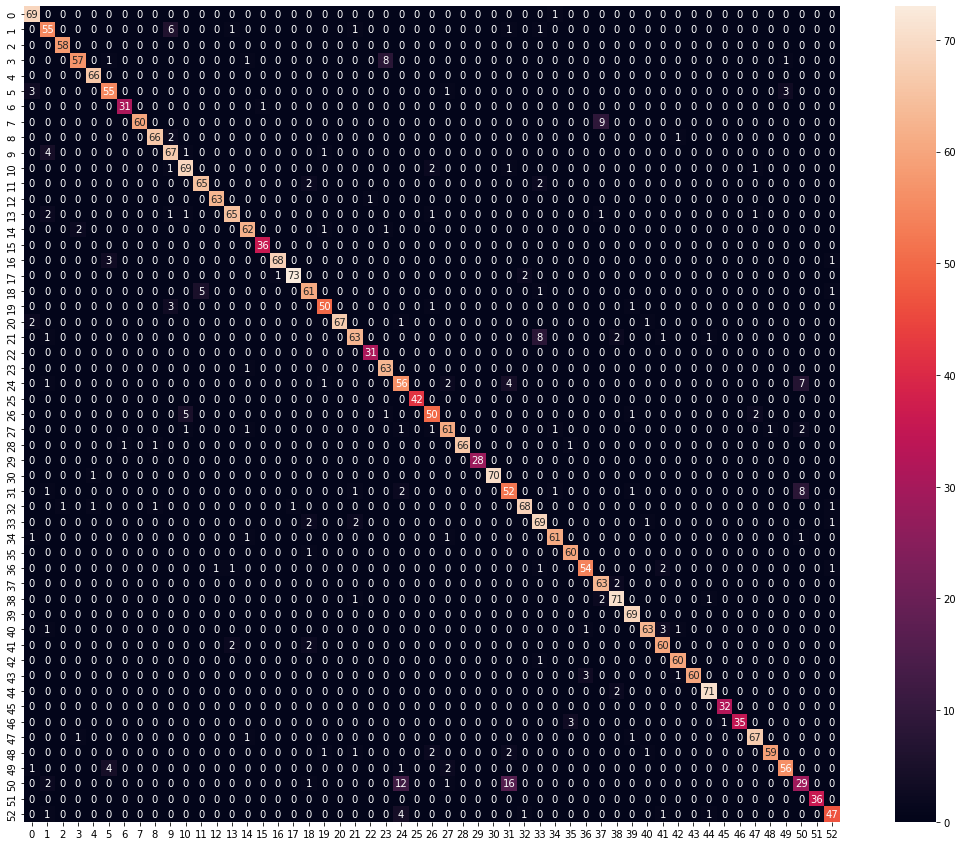

In [125]:
svc = SVC(C=10,kernel='rbf')
classification_model(svc,xc_train,xc_test,yc_train,yc_test)

In [90]:
abc = AdaBoostClassifier()
abc_para = {'n_estimators':range(50,300,50),'algorithm':['SAMME','SAMME.R']}
gs_abc = GridSearchCV(abc,abc_para,cv=3,scoring='accuracy')
gs_abc.fit(xc_train,yc_train)
gs_abc.best_params_

{'algorithm': 'SAMME', 'n_estimators': 250}

Model: AdaBoostClassifier
Accuracy Score: 11.58
f1 Score: 11.58
CV Score: 0.09175434361513599
ROC_AUC Score: 49.7


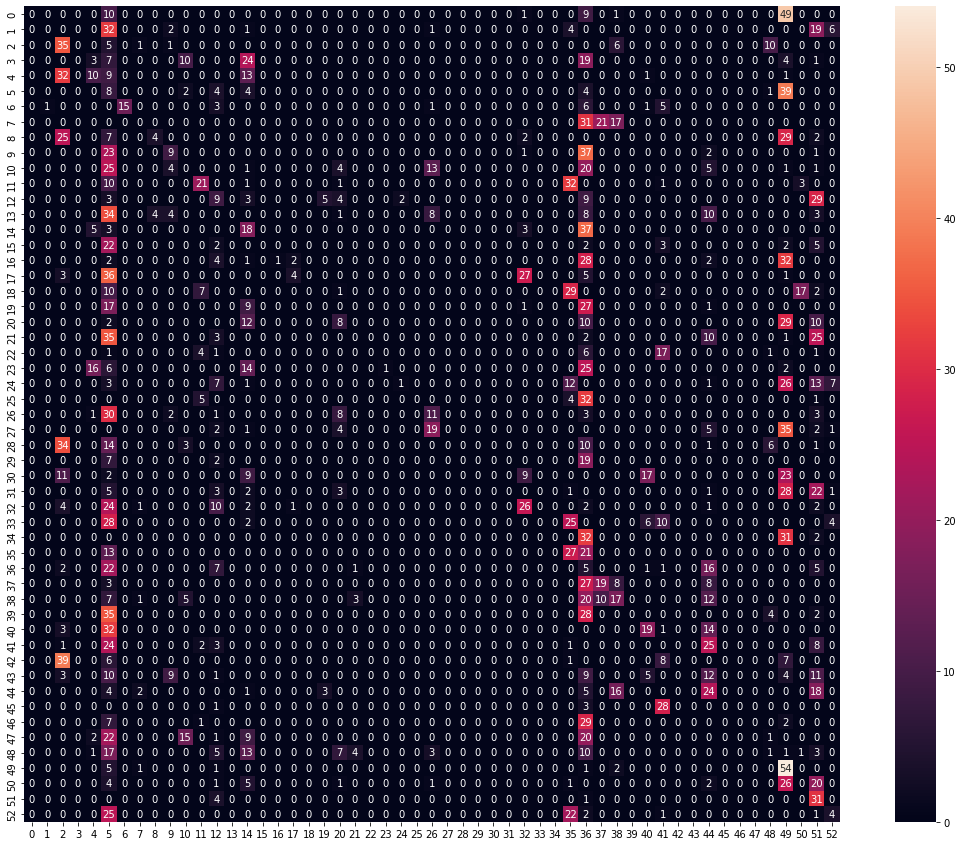

In [126]:
abc = AdaBoostClassifier(n_estimators=250,algorithm='SAMME')
classification_model(abc,xc_train,xc_test,yc_train,yc_test)

In [127]:
classifier_models = pd.DataFrame({'Model Name':Model_c,'Accuracy Score':score_c,'F1 Score':f1,'CV Score':cross,'ROC_AUC Score':roc_auc})
classifier_models.sort_values(by='F1 Score',ascending=False)

,Model Name,Accuracy Score,F1 Score,CV Score,ROC_AUC Score
4,SVC,92.03,92.03,0.722171,96.13
2,RandomForestClassifier,91.45,91.45,0.760506,95.83
3,BaggingClassifier,89.24,89.24,0.726179,94.77
1,DecisionTreeClassifier,81.23,81.23,0.617135,90.99
0,LogisticRegression,59.52,59.52,0.492451,80.34
5,AdaBoostClassifier,11.58,11.58,0.091754,49.70


- SVC had the best F1 and accuracy score, so we'll pick SupportVectorClassifier.

#### Saving the SVC model

In [118]:
pickle.dump(classifier_models,open('SVC_avocado','wb'))